[View in Colaboratory](https://colab.research.google.com/github/Shreyas3108/Multipath-selection-using-ML/blob/master/treeclass.ipynb)

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 
  
  ## Upload file to Gdrive already done. 

Saving mpdata.csv to mpdata.csv
User uploaded file "mpdata.csv" with length 23625421 bytes


In [0]:
import pandas as pd 
import numpy as np 

In [0]:
data = pd.read_csv('mpdata.csv')

In [82]:
data.head() ## First 5 rows of the dataset

,name,time,EncodingPath,Producer,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,output-load,output-packet-rate,reliability,peak-input-data-rate,peak-output-data-rate,peak-input-packet-rate,peak-output-packet-rate,delay
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,7214502.0,18.0,639356.0,Path-1,0.0,12225031.0,31.0,1080487.0,255.0,0.0,0.0,0.0,0.0,0
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6564805.0,16.0,598775.0,Path-1,0.0,11132639.0,28.0,980453.0,255.0,0.0,0.0,0.0,0.0,7
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,13838151.0,35.0,1217949.0,Path-1,0.0,9664580.0,24.0,856189.0,255.0,0.0,0.0,0.0,0.0,3
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,10752468.0,27.0,968818.0,Path-1,0.0,13502426.0,34.0,1146930.0,255.0,0.0,0.0,0.0,0.0,0
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6925863.0,17.0,605078.0,Path-2,0.0,12163551.0,31.0,1055221.0,255.0,0.0,0.0,0.0,0.0,8


In [83]:
data.shape ## Shape of the data

(80544, 19)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
data['path'] = le.fit_transform(data['interface-name']) ## Encoding path as numeric for prediction 

In [0]:
data = pd.get_dummies(data , columns= ['Producer']) ## Using one-hot encoder for producer for better accuracy of the model

In [87]:
data.head()

,name,time,EncodingPath,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,...,Producer_leaf3,Producer_leaf4,Producer_leaf5,Producer_leaf6,Producer_leaf7,Producer_leaf8,Producer_spine1,Producer_spine2,Producer_spine3,Producer_spine4
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,7214502.0,18.0,639356.0,Path-1,0.0,12225031.0,...,0,0,0,0,0,0,0,0,0,0
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6564805.0,16.0,598775.0,Path-1,0.0,11132639.0,...,0,0,0,0,0,0,0,0,0,0
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,13838151.0,35.0,1217949.0,Path-1,0.0,9664580.0,...,0,0,0,0,0,0,0,0,0,0
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,10752468.0,27.0,968818.0,Path-1,0.0,13502426.0,...,0,0,0,0,0,0,0,0,0,0
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6925863.0,17.0,605078.0,Path-2,0.0,12163551.0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
inp = data[['bandwidth','input-data-rate','input-load','load-interval','output-data-rate','output-load',
            'output-packet-rate','reliability','peak-input-data-rate','peak-output-data-rate'
           ,'peak-input-packet-rate', 'peak-output-packet-rate', 'delay','Producer_leaf1', 
            'Producer_leaf2', 'Producer_leaf3', 'Producer_leaf4','Producer_leaf5',
            'Producer_leaf6', 'Producer_leaf7', 'Producer_leaf8',
           'Producer_spine1', 'Producer_spine2', 'Producer_spine3',
           'Producer_spine4']] 
out = data['path'] 

## Setting Features and labels 

In [0]:
from sklearn.cross_validation import train_test_split
x_train , y_train , x_test , y_test = train_test_split(inp , out ,
                                                       test_size = 0.3,random_state = 23)

In [90]:
#!pip install pandas-ml
y_train.shape

(24164, 25)

84.56795232577387
('Accuracy Score : ', 84.56795232577387)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           453   504   432   428     1817
1           449   446   451   455     1801
2           428   454   467   465     1814
3           448   460   470   455     1833
__all__    1778  1864  1820  1803     7265), ('overall', OrderedDict([('Accuracy', 0.2506538196834136), ('95% CI', (0.24072089353755, 0.26078719451653254)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.8788715751678092), ('Kappa', 0.000896677111058684), ("Mcnemar's Test P-Value", 'ToDo')])), ('clas

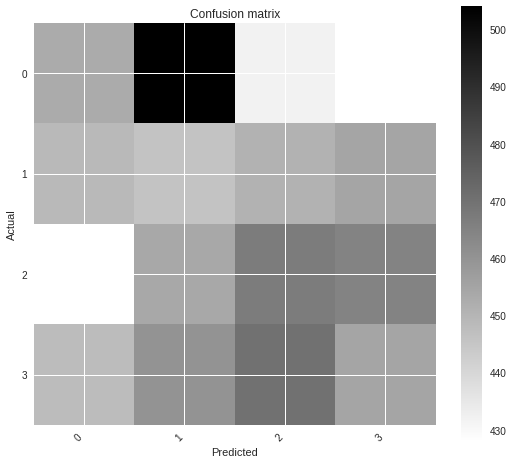

In [91]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score , confusion_matrix
from pandas_ml import ConfusionMatrix

mod = DecisionTreeClassifier() 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
print(y_pred * 100)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm.stats())

In [92]:
modp = mod.predict_proba(y_train)
print(modp)
modp.shape

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


(24164, 4)

('Accuracy Score : ', 84.66727363019368)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=400,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           450   500   428   439     1817
1           455   446   450   450     1801
2           432   463   451   468     1814
3           450   439   473   471     1833
__all__    1787  1848  1802  1828     7265), ('overall', OrderedDict([('Accuracy', 0.2502408809359945), ('95% CI', (0.24031358835499675, 0.26036895515797287)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.7941579719491065), ('Kappa', 0.00032817616858481344), ("Mcnemar's Test P-Value", 'ToDo')])), ('class', Classes

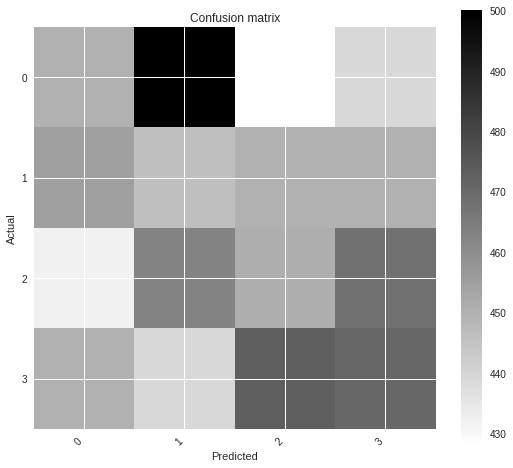

In [93]:
mod = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 400) 

mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm.stats())

In [94]:
mpdp = mod.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 32.776030458533356)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
OrderedDict([('cm', Predicted     0    1     2     3  __all__
Actual                                   
0           680   87   490   560     1817
1           672   65   504   560     1801
2           678   66   462   608     1814
3           712   78   483   560     1833
__all__    2742  296  1939  2288     7265), ('overall', OrderedDict([('Accuracy', 0.24322092222986924), ('95% CI', (0.233391261991206, 0.25325702535232986)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9999999999999999), ('Kappa', -0.009842450756459594), ("Mcnemar's Test P-Value", 'ToDo')])), ('class', Classes                                         0           1          2  \
Population            

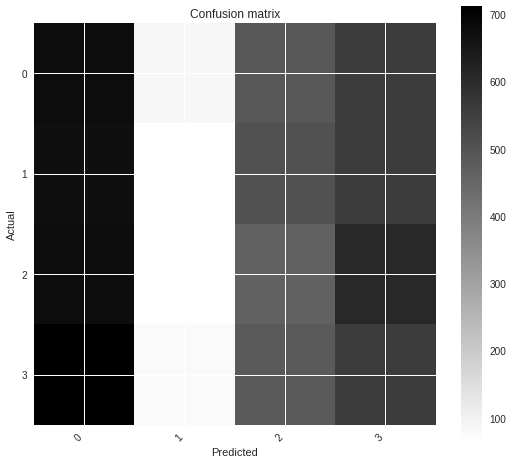

In [95]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(multi_class = 'multinomial' , solver='lbfgs') 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm.stats())

In [96]:
mpdp = mod.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 75.44694586988909)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           415   511   401   490     1817
1           420   455   433   493     1801
2           410   451   458   495     1814
3           447   449   441   496     1833
__all__    1692  1866  1733  1974     7265), ('overall', OrderedDict([('Accuracy', 0.25106675843083276), ('95% CI', (0.24112821076036872, 0.2612054218413693)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > 

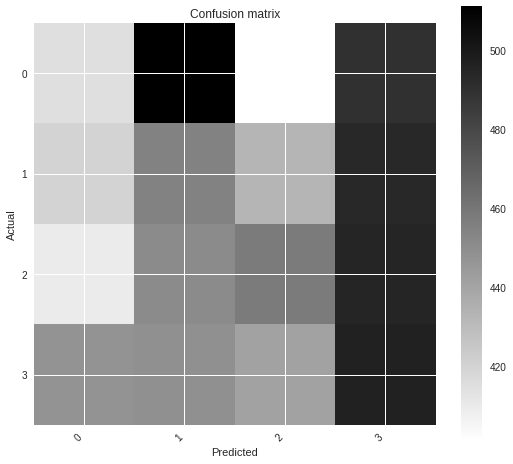

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
mod = GradientBoostingClassifier() 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm.stats())

In [98]:
mpdp = mod.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [0]:
from sklearn.ensemble import RandomForestClassifier

('Accuracy Score : ', 85.72256248965402)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           458   505   417   437     1817
1           451   452   441   457     1801
2           440   464   450   460     1814
3           469   462   448   454     1833
__all__    1818  1883  1756  1808     7265), ('overall', OrderedDict([('Accuracy', 0.24969029593943565), ('95% CI', (0.23977053354184608, 0.25981128392647923)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9689960195845702), ('Kappa', -0.00038718

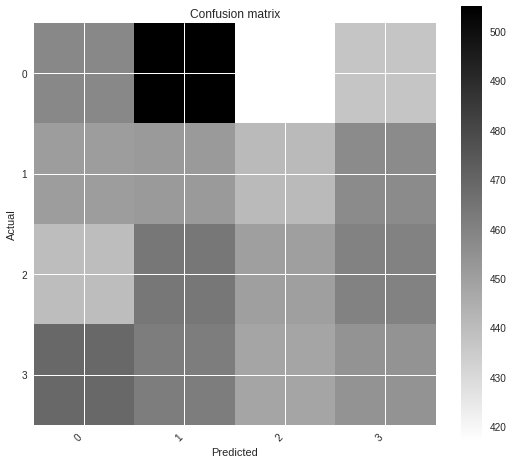

In [100]:
mod2 = RandomForestClassifier()
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm.stats())

In [101]:
mpdp = mod2.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 86.3888429068035)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=400, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           460   496   423   438     1817
1           459   446   426   470     1801
2           430   468   458   458     1814
3           463   460   454   456     1833
__all__    1812  1870  1761  1822     7265), ('overall', OrderedDict([('Accuracy', 0.2505161734342739), ('95% CI', (0.2405851238045703, 0.2606477827350481)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9126122663082435), ('Kappa', 0.0007034345750143

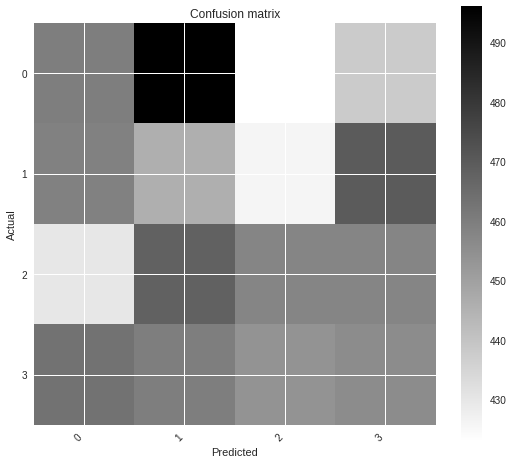

In [102]:
mod2 = RandomForestClassifier(criterion = 'entropy' ,n_estimators = 20 , max_depth= 400 , max_features= 7)
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm.stats())

In [103]:
mpdp = mod2.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 86.53368647574905)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=400, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           442   497   428   450     1817
1           455   463   431   452     1801
2           430   465   461   458     1814
3           462   466   458   447     1833
__all__    1789  1891  1778  1807     7265), ('overall', OrderedDict([('Accuracy', 0.24955264969029595), ('95% CI', (0.2396347731941253, 0.2596718627648926)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.982413573289463), ('Kappa', -0.00056539622523878

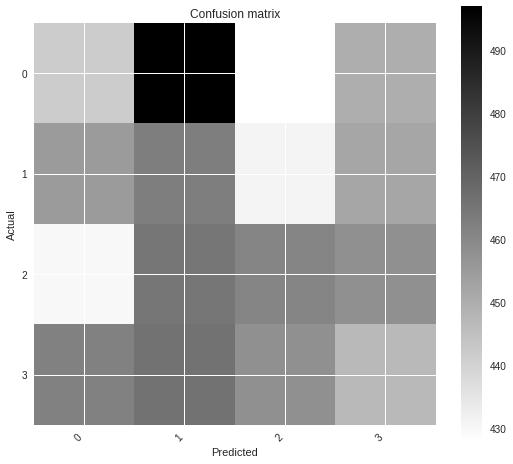

In [104]:
mod2 = RandomForestClassifier(n_estimators = 20 , max_depth = 400 , max_features = 8 )
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm.stats())

In [105]:
mpdp = mod2.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

('Accuracy Score : ', 86.70336037079953)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=200, max_features=8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           458   499   415   445     1817
1           455   443   435   468     1801
2           436   458   463   457     1814
3           460   462   460   451     1833
__all__    1809  1862  1773  1821     7265), ('overall', OrderedDict([('Accuracy', 0.24982794218857537), ('95% CI', (0.23990629523254306, 0.25995070374586293)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.8993493426464827), ('Kappa', -0.0002161134217802504), ("Mcnemar'

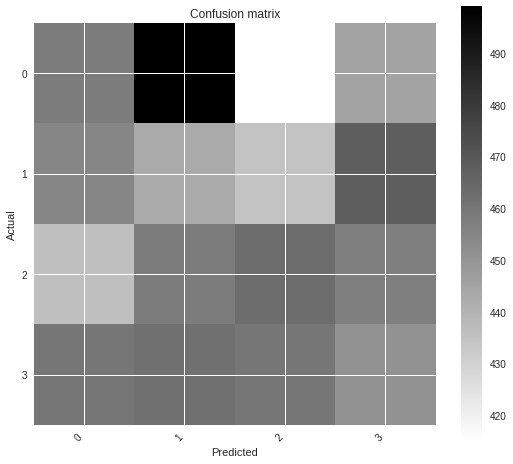

In [107]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 200 , max_features = 8 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod3)
print(cm.stats())

In [108]:
mpdp = mod3.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 86.91027975500745)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           456   499   416   446     1817
1           452   447   445   457     1801
2           424   457   474   459     1814
3           461   459   464   449     1833
__all__    1793  1862  1799  1811     7265), ('overall', OrderedDict([('Accuracy', 0.25134205092911216), ('95% CI', (0.24139976225486232, 0.2614842333822679)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.8366481411862158), ('Kappa', 0.0018086727929337463), ("Mcnemar's

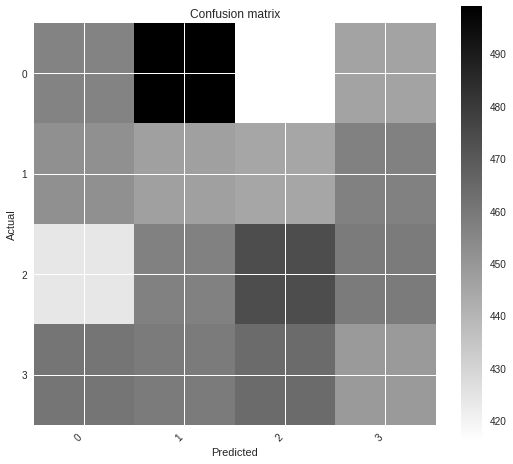

In [109]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 400 , max_features = 16 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod3)
print(cm.stats())

In [110]:
mpdp = mod3.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


('Accuracy Score : ', 86.98890912100646)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
OrderedDict([('cm', Predicted     0     1     2     3  __all__
Actual                                    
0           453   501   424   439     1817
1           452   446   440   463     1801
2           425   463   466   460     1814
3           457   462   463   451     1833
__all__    1787  1872  1793  1813     7265), ('overall', OrderedDict([('Accuracy', 0.24996558843771507), ('95% CI', (0.24004205826543754, 0.2600901222237503)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9355577112410469), ('Kappa', -2.3796265769745716e-05), ("Mcne

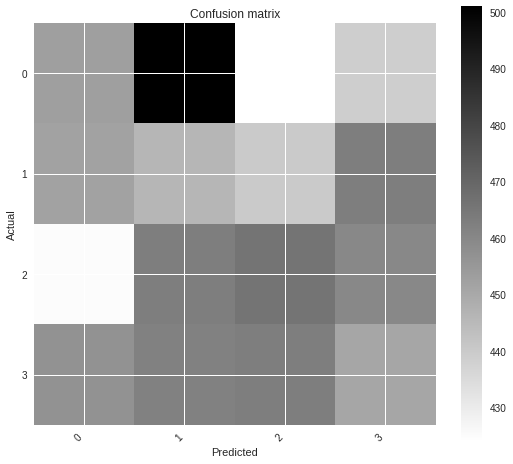

In [111]:
mod3 = ExtraTreesClassifier(criterion = 'entropy' , n_estimators = 25 , max_features = 16 , max_depth = 400)
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 

print(mod3)
print(cm.stats())

In [112]:
mpdp = mod3.predict_proba(y_train)
print(modp)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [0]:
### Done! 